# Breast Cancer Classification with Neural Networks
We'll learn how to use Neural networks in numerical datasets

1 --> Benign

0 --> Malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

### Data Collection and Preprocessing

In [2]:
# loading the data from sklearn
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df = pd.DataFrame(breast_cancer.data , columns = breast_cancer.feature_names)

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Adding Target column to the dataframe labelled 0 and 1

In [6]:
df['target'] = breast_cancer.target

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.shape

(569, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

There are no missing values in the given dataset

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [13]:
df.groupby('target').mean()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Marking the features and target

In [14]:
X = df.drop(columns = 'target',axis=1)
Y = df['target']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print (Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


Split the data into train test split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 2, test_size =0.1)

In [18]:
print(X.shape,X_train.shape)

(569, 30) (512, 30)


Apply standard Scaler

--We always apply standard scaler after spliting into training dataset and test dataset



In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
## we dont fit the data to test data, we do it only to train data
# X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-1.12131135, -1.0377998 , -1.12795461, ..., -1.34880569,
         1.01888845, -0.22246861],
       [-0.76615041,  0.23644588, -0.59111248, ...,  2.14255968,
         5.91994748,  4.86553884],
       [-1.03323143, -1.01463169, -1.00682523, ..., -0.3345905 ,
         0.16466297,  0.66902925],
       ...,
       [-0.4706565 , -1.51274591, -0.5396119 , ..., -1.33358719,
        -1.01248201, -0.76635906],
       [-0.50475195, -1.64248729, -0.53507984, ..., -0.12514775,
         0.30782925, -0.45713102],
       [ 0.95282855,  1.23267431,  0.99592964, ...,  0.85576756,
        -1.20337038,  0.47932552]])

## Building a Neural Network

In [22]:
# import tensorflow and keras libraries
import tensorflow as tf

## random seed gives the same accuracy score ..same reproducable results
tf.random.set_seed(3)
from tensorflow import keras

In [23]:
# setting up the layers for the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), #input layer  #convert into 1D array and each feature will go to one neuron from the X_train dataset
    keras.layers.Dense(20,activation ='relu'),    # hidden layer
    keras.layers.Dense(2 , activation = 'sigmoid')   #output layer
])

2022-07-29 12:26:19.835594: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
#compile the neural network with optimizers,loss etc.
#when target is numerical ..i.e: dog-0,cat-1,horse-2.. then we use sparse categorical crossentropy
#when we have OHE One hot encoded labels we use categorical crossentropy
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

Training the Neural Network

In [25]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

2022-07-29 12:26:20.176537: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
15/15 [==============================] - 1s 19ms/step - loss: 0.5598 - accuracy: 0.7283 - val_loss: 0.3450 - val_accuracy: 0.9423
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8804 - val_loss: 0.2498 - val_accuracy: 0.9808
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.9109 - val_loss: 0.1995 - val_accuracy: 0.9808
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2258 - accuracy: 0.9217 - val_loss: 0.1693 - val_accuracy: 0.9808
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1931 - accuracy: 0.9326 - val_loss: 0.1482 - val_accuracy: 0.9808
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1704 - accuracy: 0.9413 - val_loss: 0.1338 - val_accuracy: 0.9808
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1532 - accuracy: 0.9478 - val_loss: 0.1223 - val_accuracy: 0.9808
Epoch 8/10
15/15 [=

You can clearly see the difference between accuracy in scaled vs Non scaled data

Visualising accuracy and loss

--try doing this using tensorboard also

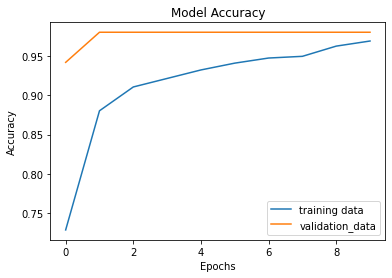

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training data','validation_data'],loc='lower right')

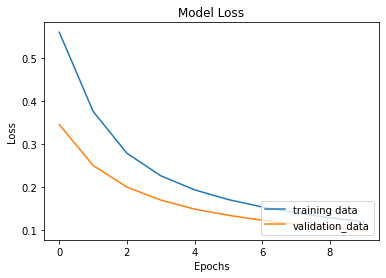

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training data','validation_data'],loc='lower right')

Getting the Accuracy of the Model on TEST DATA

In [28]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print("Accuracy value is:",accuracy)

2/2 [==============================] - 0s 4ms/step - loss: 0.1418 - accuracy: 0.9649
Accuracy value is: 0.9649122953414917


## Build a Predictive Model

In [29]:
X_test_scaled.shape
X_test_scaled[0]

array([-0.05014595, -1.43397436, -0.0666305 , -0.16896875,  2.00130866,
       -0.14461712,  0.14826501,  0.43821909,  0.58694955,  0.23195976,
        0.5127032 ,  2.61793399,  0.60496095,  0.103997  ,  0.9793095 ,
        0.37358868,  0.59188895,  2.80272108, -0.41828581,  0.68908991,
       -0.33951447, -1.69944382, -0.3799908 , -0.39864381,  0.29733091,
       -0.77007935, -0.57106522, -0.20802078, -1.20337038, -0.64299681])

In [30]:
Y_pred = model.predict(X_test_scaled)

In [31]:
print(Y_pred.shape)
print(Y_pred[1])

(57, 2)
[0.4439516 0.6565707]


In [32]:
X_test_scaled

array([[-0.05014595, -1.43397436, -0.0666305 , ..., -0.20802078,
        -1.20337038, -0.64299681],
       [ 0.23966538, -0.06010584,  0.21023667, ...,  0.50619405,
         0.07240026,  0.02535244],
       [-1.26394398, -0.29178687, -1.27174425, ..., -1.36070927,
         0.22352022, -0.30196873],
       ...,
       [-1.11847006, -0.42384506, -1.10447034, ..., -0.8973737 ,
         0.22033875,  0.20354236],
       [ 0.28512598, -0.62077394,  0.28233749, ...,  0.14908664,
         0.79300387,  0.72056725],
       [-0.68375307, -0.62309075, -0.70894583, ..., -0.68747892,
        -1.91602032, -0.59365191]])

In [33]:
Y_pred

array([[3.30295831e-01, 5.21983624e-01],
       [4.43951607e-01, 6.56570673e-01],
       [6.27522767e-02, 9.65573788e-01],
       [9.90425289e-01, 3.74138355e-04],
       [3.77757281e-01, 4.01699394e-01],
       [8.96568000e-01, 2.04054117e-02],
       [2.25238800e-01, 7.72301733e-01],
       [6.53392375e-02, 9.48375344e-01],
       [1.65187985e-01, 9.21365678e-01],
       [1.83591604e-01, 8.59119773e-01],
       [5.10327578e-01, 5.90510488e-01],
       [2.51715302e-01, 8.21529031e-01],
       [2.45334685e-01, 8.20710480e-01],
       [3.59731227e-01, 8.15395594e-01],
       [9.71079767e-02, 9.44581628e-01],
       [8.01569700e-01, 2.31906235e-01],
       [9.87282097e-02, 9.23643827e-01],
       [9.46481228e-02, 8.75514150e-01],
       [1.65450305e-01, 8.77884746e-01],
       [8.25357080e-01, 1.95848942e-02],
       [2.03027427e-02, 3.75800818e-01],
       [4.71290648e-02, 8.73579085e-01],
       [2.03202188e-01, 9.27299500e-01],
       [5.04796803e-02, 9.24554527e-01],
       [1.133996

In [34]:
#model.predict() gives the prediction probabilty for each class for that data point

COnverting the prediction probability to class label


In [35]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [36]:
Y_pred_labels

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1]

In [37]:
print(Y_pred.shape)
print(Y_pred_labels[1])

(57, 2)
1


In [38]:
input_data=(11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)
# change the input data to numpy array
input_numpy = np.asarray(input_data)

In [39]:
#reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_numpy.reshape(1,-1)

# standardize the input data
input_data_scaled = scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_scaled)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
    print('Malignant')
else:
    print('Benign')

[[0.09070581 0.9115894 ]]
[1]
Benign


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
